In [4]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_excel('C:/Users/User/Downloads/data1.xlsx')

In [6]:
df.head()

,obs
0,20.710038
1,20.035838
2,18.924596
3,16.312833
4,12.170810


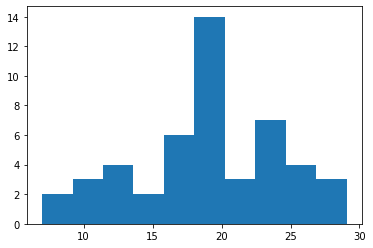

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['obs'])
plt.show()

(array([ 4.,  6.,  7., 17.,  8.,  6.]),
 array([ 6.99510332, 10.6728652 , 14.35062709, 18.02838897, 21.70615086,
        25.38391274, 29.06167462]),
 <BarContainer object of 6 artists>)

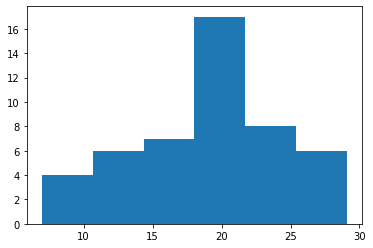

In [89]:
plt.hist(df['obs'],bins=6)

In [8]:
df.describe()

,obs
count,48.000000
mean,19.006886
std,5.392988
min,6.995103
25%,16.198008
50%,19.359880
75%,23.335490
max,29.061675


In [9]:
stats_labels = ['Mean Observed', 'Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].mean(), 2), round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('Kurt Observed', -0.31), ('Variance Observed', 29.08), ('Skew Observed', -0.29), ('Mean Observed', 19.01)}


In [31]:
df.median()

obs    19.35988
dtype: float64

In [11]:
import statsmodels.api as sm
import scipy.stats as stats

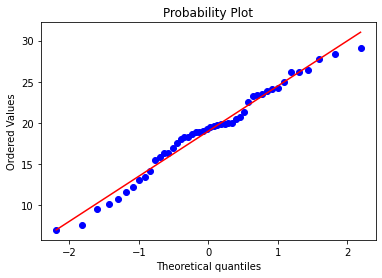

In [12]:
import matplotlib.pyplot as pltp
stats.probplot(df['obs'], plot=plt)  #standard normall distribution
plt.show()

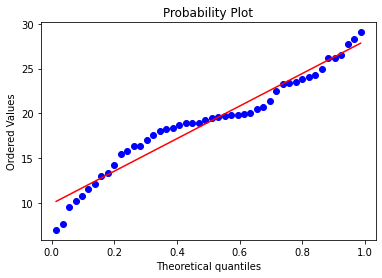

In [81]:
stats.probplot(df['obs'],dist='uniform',plot=plt) #uniform distribition
plt.show()

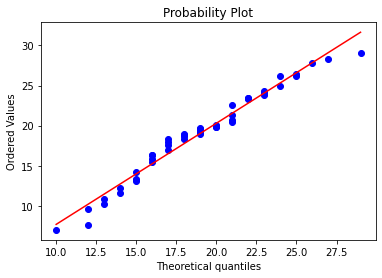

In [32]:
stats.probplot(df['obs'], dist='poisson', sparams=(19.01), plot=plt)
plt.show() #poisson distribution


In [15]:
print(df.head())

         obs
0  20.710038
1  20.035838
2  18.924596
3  16.312833
4  12.170810


In [82]:
df['exp']=19.006886

In [86]:
df

,obs,exp
0,20.710038,19.006886
1,20.035838,19.006886
2,18.924596,19.006886
3,16.312833,19.006886
4,12.170810,19.006886
5,16.352038,19.006886
6,28.362005,19.006886
7,21.379978,19.006886
8,18.963487,19.006886
9,19.821240,19.006886


In [87]:
from scipy.stats import chisquare


In [88]:
chisquare(df['obs'],df['exp'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
1.1971062085928953e-08

In [17]:
grouped_df = pd.DataFrame()

In [18]:
grouped_df['frequency']= df.groupby('obs')['obs'].count()
grouped_df.head()

,frequency
obs,
6.995103,1
7.640148,1
9.590593,1
10.178644,1
10.789854,1


In [19]:
len(df)

48

In [84]:
grouped_df['OBS_PROBA'] = grouped_df['frequency']/len(df)
print(grouped_df)

           frequency  OBS_PROBA  POISSON_PMF     Normal_pdf  POISSON_FREQ  \
obs                                                                         
6.995103           1   0.020833          0.0   9.453144e-12           0.0   
7.640148           1   0.020833          0.0   8.425972e-14           0.0   
9.590593           1   0.020833          0.0   4.244460e-21           0.0   
10.178644          1   0.020833          0.0   1.268858e-23           0.0   
10.789854          1   0.020833          0.0   2.091318e-26           0.0   
11.575366          1   0.020833          0.0   3.202942e-30           0.0   
12.170810          1   0.020833          0.0   2.723893e-33           0.0   
13.048969          1   0.020833          0.0   4.227045e-38           0.0   
13.367388          1   0.020833          0.0   6.302418e-40           0.0   
14.209545          1   0.020833          0.0   5.707603e-45           0.0   
15.488801          1   0.020833          0.0   3.211045e-53           0.0   

In [22]:
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import chisquare

In [24]:
norm.pdf()

<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.norm_gen object at 0x000001F82BA10490>>

poisson.pmf

In [27]:
grouped_df.index

Float64Index([ 6.995103319003263,  7.640148424964499,  9.590592651702766,
              10.178644427742828,  10.78985442862133, 11.575365600463355,
              12.170809956576681, 13.048968677223552, 13.367388062362181,
              14.209545488435396, 15.488800795170471, 15.853531053832869,
                16.3128334253823, 16.352038197102495,  16.98387116756606,
              17.536214232269266, 17.989393380680234, 18.316169267027547,
              18.330848402057153, 18.657690789330154, 18.883161556499847,
              18.924595628278645,  18.96348734119981,  19.23402632600408,
               19.48573414042562,  19.58581933987662, 19.700079952512667,
              19.821239954056594, 19.857463619177754, 19.975351586309372,
               20.03583753225472, 20.446334279989376,  20.71003794041169,
              21.379978339426536, 22.515949444835982,  23.31282140584638,
               23.40349460095522,  23.48514447797809, 23.865719343096035,
              24.097128243984947,  24.

In [28]:
df['obs'].mean()

19.0068857724674

grouped_df['POISSON_PMF'] = poisson.pmf(k=grouped_df.index, mu=df['obs'].mean())

In [45]:
grouped_df['Normal_pdf']=norm.pdf(grouped_df.index)

In [37]:
df['obs'].mean()

19.0068857724674

In [47]:
grouped_df['Normal_pdf'].head()

obs
6.995103     9.453144e-12
7.640148     8.425972e-14
9.590593     4.244460e-21
10.178644    1.268858e-23
10.789854    2.091318e-26
Name: Normal_pdf, dtype: float64

grouped_df['POISSON_PMF'].head()

In [85]:
grouped_df.head()

,frequency,OBS_PROBA,POISSON_PMF,Normal_pdf,POISSON_FREQ,Normal_freq
obs,,,,,,
6.995103,1,0.020833,0.0,9.453144e-12,0.0,0.0
7.640148,1,0.020833,0.0,8.425972e-14,0.0,0.0
9.590593,1,0.020833,0.0,4.244460e-21,0.0,0.0
10.178644,1,0.020833,0.0,1.268858e-23,0.0,0.0
10.789854,1,0.020833,0.0,2.091318e-26,0.0,0.0


In [60]:
grouped_df['POISSON_FREQ'] = grouped_df['POISSON_PMF']*len(df)
grouped_df['Normal_freq'] = grouped_df['Normal_pdf']*len(df)

In [61]:
grouped_df.head()

,frequency,OBS_PROBA,POISSON_PMF,Normal_pdf,POISSON_FREQ,Normal_freq
obs,,,,,,
6.995103,1,0.020833,0.0,9.453144e-12,0.0,4.537509e-10
7.640148,1,0.020833,0.0,8.425972e-14,0.0,4.044466e-12
9.590593,1,0.020833,0.0,4.244460e-21,0.0,2.037341e-19
10.178644,1,0.020833,0.0,1.268858e-23,0.0,6.090519e-22
10.789854,1,0.020833,0.0,2.091318e-26,0.0,1.003833e-24


In [70]:

grouped_df['Normal_freq'] = [round(elem,9) for elem in grouped_df['Normal_freq']]

In [71]:
grouped_df.head()

,frequency,OBS_PROBA,POISSON_PMF,Normal_pdf,POISSON_FREQ,Normal_freq
obs,,,,,,
6.995103,1,0.020833,0.0,9.453144e-12,0.0,0.0
7.640148,1,0.020833,0.0,8.425972e-14,0.0,0.0
9.590593,1,0.020833,0.0,4.244460e-21,0.0,0.0
10.178644,1,0.020833,0.0,1.268858e-23,0.0,0.0
10.789854,1,0.020833,0.0,2.091318e-26,0.0,0.0


In [72]:
obs_freq = list(grouped_df['frequency'])
expec_freq = list(grouped_df['Normal_freq'])

obs_freq = list(grouped_df['frequency'])
expec_freq = list(grouped_df['POISSON_FREQ'])

NULL HYPOTHESIS: The given data follows Poisson distribution.

---


ALTERNATE HYPOTHESIS: The given data does not follow Poisson distribution

In [73]:
obs_freq

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [74]:
expec_freq

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [75]:
stats.chisquare(obs_freq, expec_freq)

c:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:6685: RuntimeWarning: divide by zero encountered in double_scalars
  relative_diff = (np.abs(f_obs_sum - f_exp_sum) /


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
inf

In [76]:
import scipy.stats

In [93]:
scipy.stats.chi2.ppf(1-.05,df=45)


61.65623337627955

In [94]:
scipy.stats.chi2.ppf(1-.05,df=3)

7.814727903251179